In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [23]:
from tensorflow import keras
from keras import layers

column_names = ['Date','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)',
                'NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']

raw_dataset = pd.read_csv("AirQualityUCI1.csv")

In [24]:
df = raw_dataset.copy()
df.drop(['un1','un2','AH'],axis=1,inplace=True)
df.isna().sum()
dataset = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Date'] = df['Date'].dt.month
df['Time'] = df['Time'].dt.hour
print(df)

      Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0       10    18     2.6         1360       150      11.9           1046   
1       10    19     2.0         1292       112       9.4            955   
2       10    20     2.2         1402        88       9.0            939   
3       10    21     2.2         1376        80       9.2            948   
4       10    22     1.6         1272        51       6.5            836   
...    ...   ...     ...          ...       ...       ...            ...   
9352     4    10     3.1         1314      -200      13.5           1101   
9353     4    11     2.4         1163      -200      11.4           1027   
9354     4    12     2.4         1142      -200      12.4           1063   
9355     4    13     2.1         1003      -200       9.5            961   
9356     4    14     2.2         1071      -200      11.9           1047   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  
0        

In [25]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [26]:
train_labels = train_features.pop('RH')
test_labels = test_features.pop('RH')

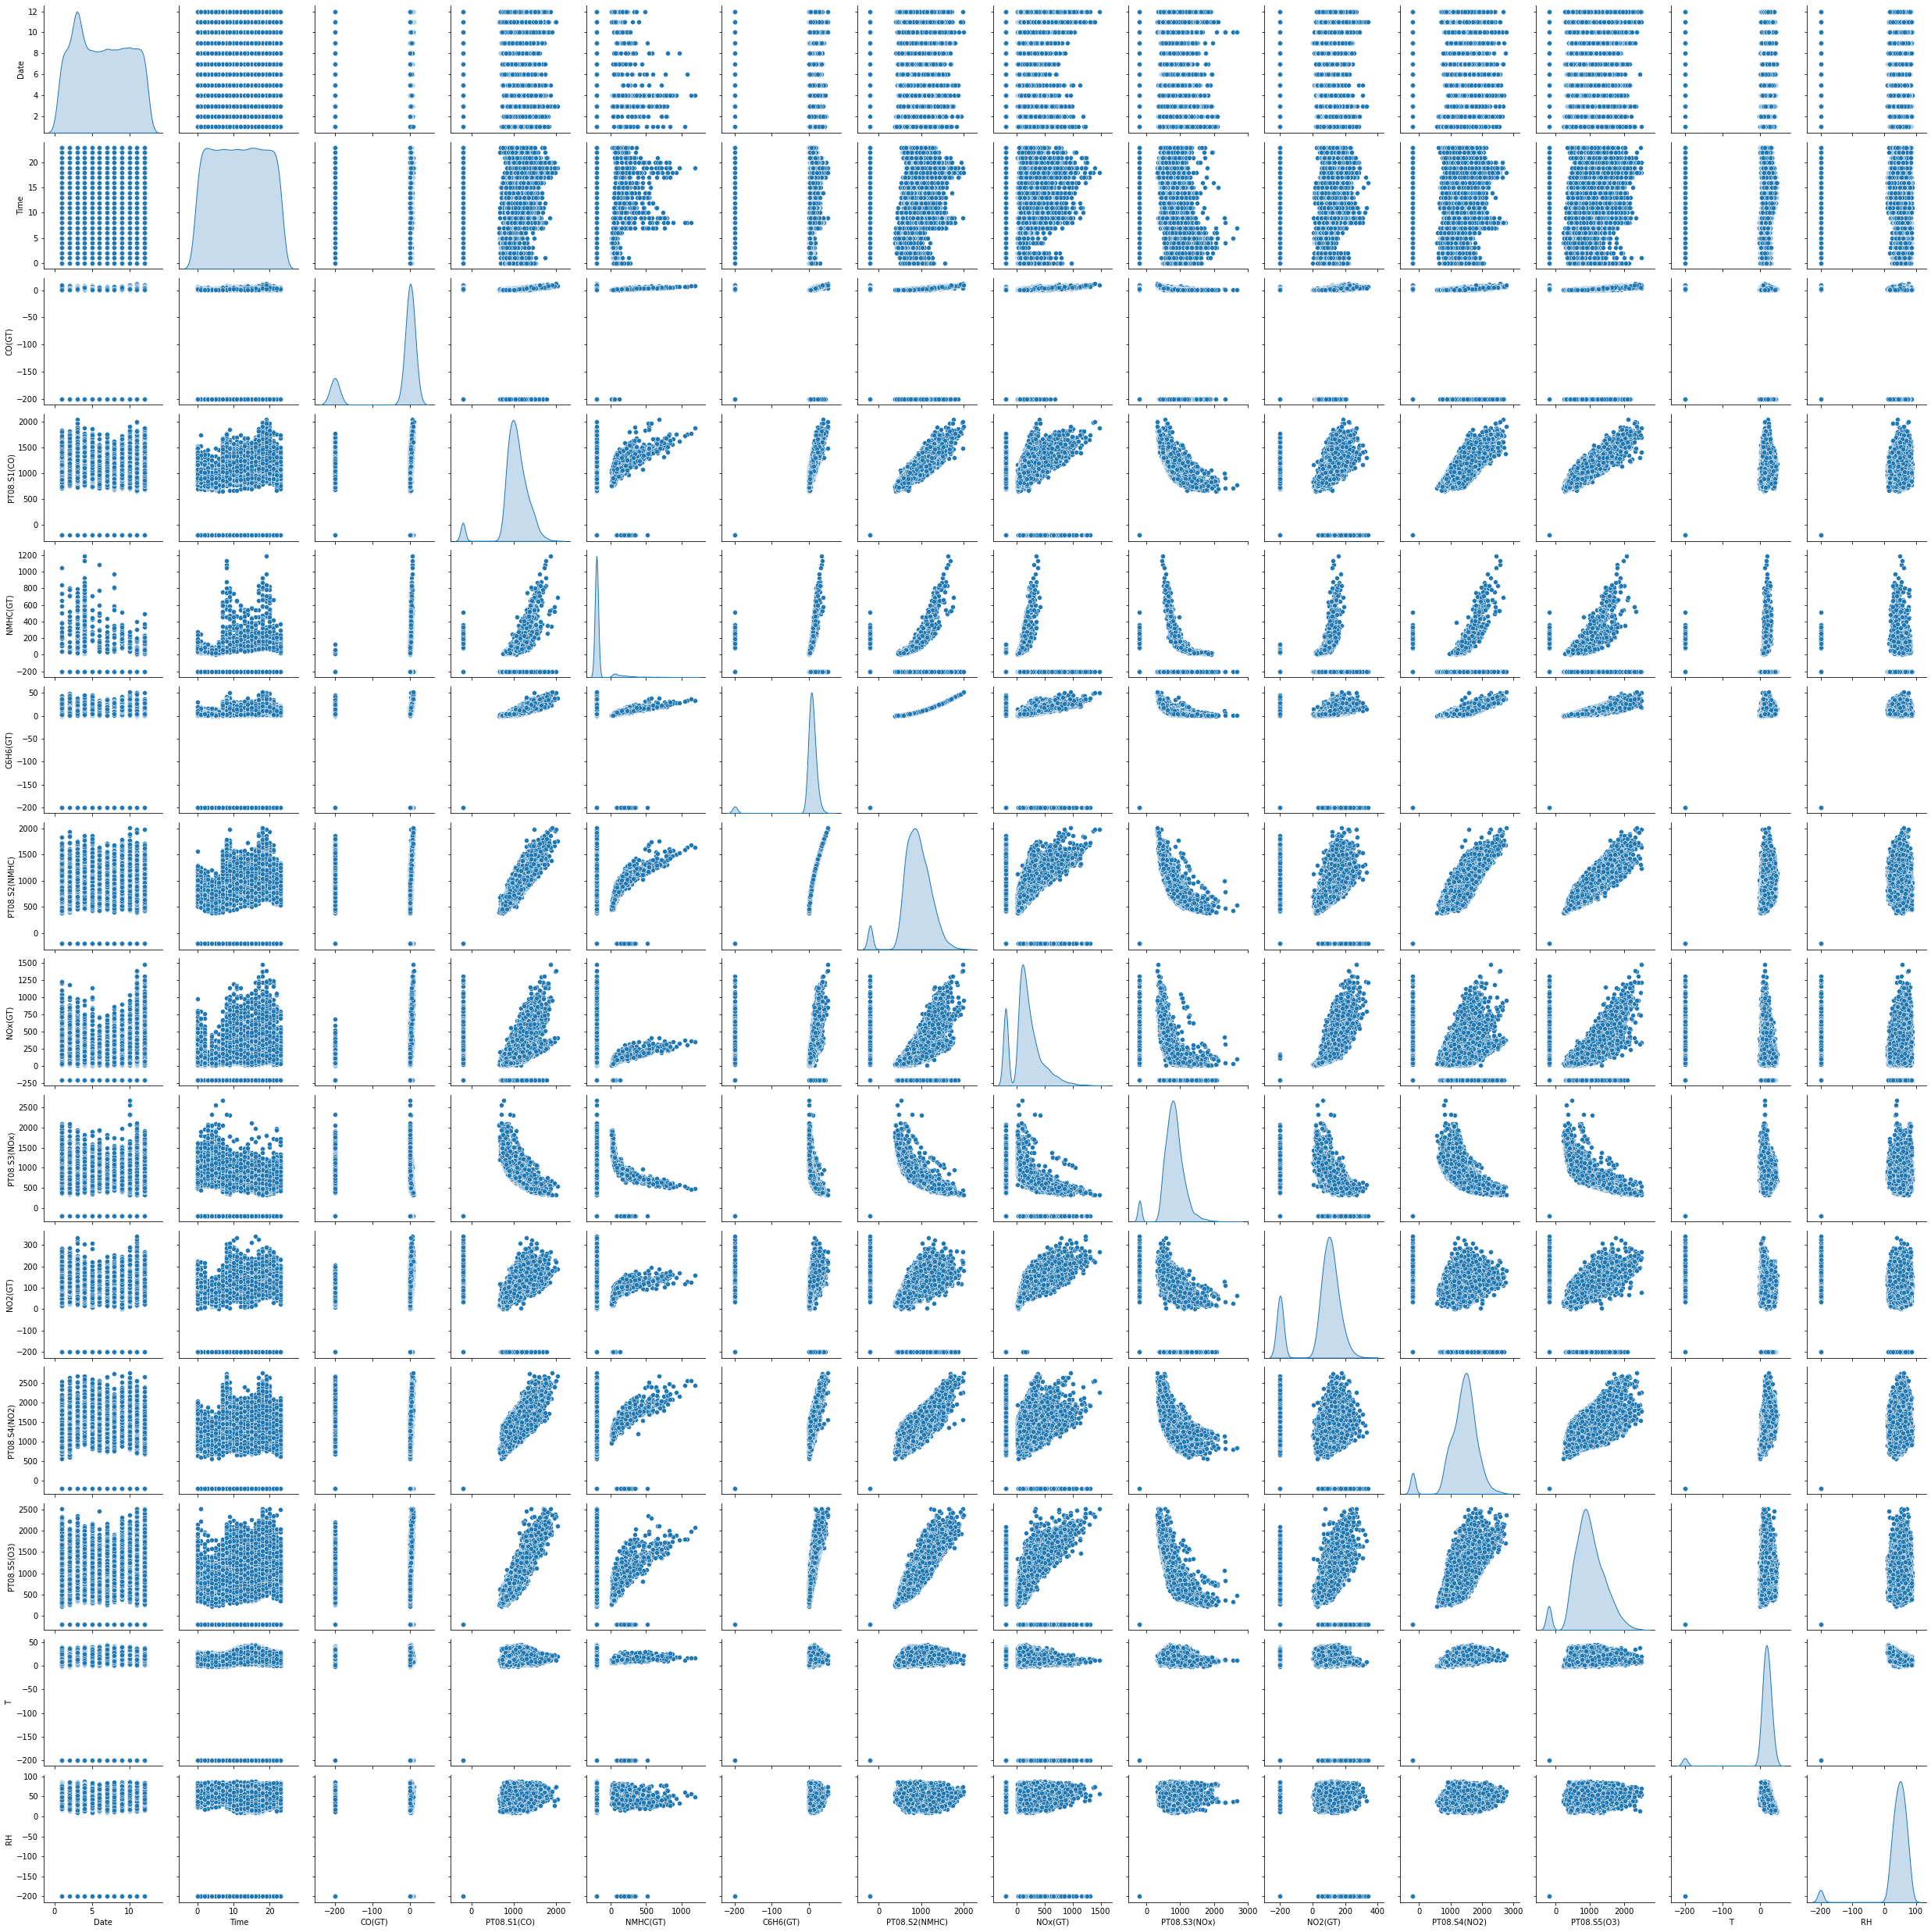

In [27]:
sns.pairplot(train_dataset[['Date','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']], diag_kind='kde')
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [28]:
normalizer.mean.numpy()

array([[   6.350653 ,   11.487847 ,  -34.28761  , 1046.2543   ,
        -158.6907   ,    1.7177918,  891.95     ,  166.50795  ,
         797.55396  ,   57.20065  , 1388.308    ,  970.66876  ,
           9.703743 ]], dtype=float32)

In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RH]')
  plt.legend()
  plt.grid(True)

In [30]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(50, activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 50)                700       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,328
Trainable params: 3,301
Non-trainable params: 27
_________________________________________________________________
None


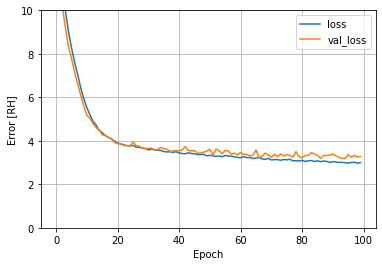

In [32]:
dnn_model1 = build_and_compile_model(normalizer)
print(dnn_model1.summary())
history = dnn_model1.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [33]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 20)                280       
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,168
Trainable params: 1,141
Non-trainable params: 27
___________________________________________________

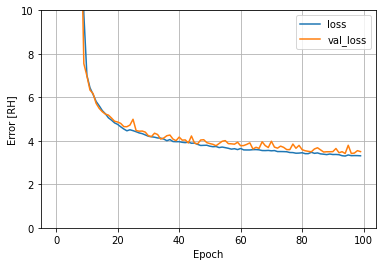

In [34]:
dnn_model2 = build_and_compile_model(normalizer)
print(dnn_model2.summary())
history = dnn_model2.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [35]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(50, activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_10 (Dense)            (None, 50)                700       
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,878
Trainable params: 5,851
Non-trainable params: 27
___________________________________________________

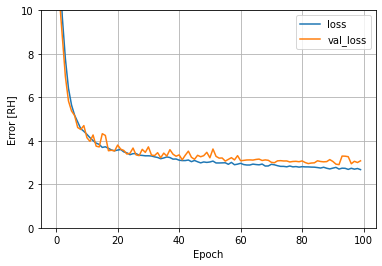

In [36]:
dnn_model3 = build_and_compile_model(normalizer)
print(dnn_model3.summary())
history = dnn_model3.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [37]:
test_results = {}
test_results['dnn_model1'] = dnn_model1.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model2'] = dnn_model2.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model3'] = dnn_model3.evaluate(test_features, test_labels, verbose=0)

In [38]:
pd.DataFrame(test_results, index=['Mean absolute error [RH]']).T

,Mean absolute error [RH]
dnn_model1,3.387113
dnn_model2,3.675897
dnn_model3,3.108318


In [39]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(75, activation='relu'),
      layers.Dense(75, activation='relu'),
      layers.Dense(75, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_14 (Dense)            (None, 75)                1050      
                                                                 
 dense_15 (Dense)            (None, 75)                5700      
                                                                 
 dense_16 (Dense)            (None, 75)                5700      
                                                                 
 dense_17 (Dense)            (None, 1)                 76        
                                                                 
Total params: 12,553
Trainable params: 12,526
Non-trainable params: 27
_________________________________________________

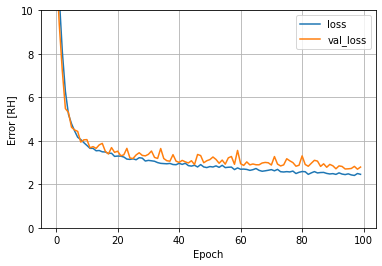

In [40]:
dnn_model4 = build_and_compile_model(normalizer)
print(dnn_model4.summary())
history = dnn_model4.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [41]:
test_results = {}
test_results['dnn_model1'] = dnn_model1.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model2'] = dnn_model2.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model3'] = dnn_model3.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model4'] = dnn_model4.evaluate(test_features, test_labels, verbose=0)

In [42]:
pd.DataFrame(test_results, index=['Mean absolute error [RH]']).T

,Mean absolute error [RH]
dnn_model1,3.387113
dnn_model2,3.675897
dnn_model3,3.108318
dnn_model4,2.863741


In [49]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(75, activation='relu'),
      layers.Dense(75, activation='relu'),
      layers.Dense(75, activation='relu'),
      layers.Dense(75, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_26 (Dense)            (None, 75)                1050      
                                                                 
 dense_27 (Dense)            (None, 75)                5700      
                                                                 
 dense_28 (Dense)            (None, 75)                5700      
                                                                 
 dense_29 (Dense)            (None, 75)                5700      
                                                                 
 dense_30 (Dense)            (None, 1)                 76        
                                                      

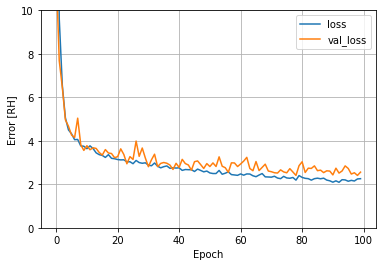

In [50]:
dnn_model5 = build_and_compile_model(normalizer)
print(dnn_model5.summary())
history = dnn_model5.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [51]:
test_results = {}
test_results['dnn_model1'] = dnn_model1.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model2'] = dnn_model2.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model3'] = dnn_model3.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model4'] = dnn_model4.evaluate(test_features, test_labels, verbose=0)
test_results['dnn_model5'] = dnn_model5.evaluate(test_features, test_labels, verbose=0)

In [53]:
pd.DataFrame(test_results, index=['Mean absolute error [RH]']).T

,Mean absolute error [RH]
dnn_model1,3.387113
dnn_model2,3.675897
dnn_model3,3.108318
dnn_model4,2.863741
dnn_model5,2.731978


So, from the above obsevations we can say that dnn_model5 has least relative error compared to other models.
Also, as we increased the number of nodes for same value of no. of layers the value of error decreased.
Similar logic is applicable for keeping number of nodes same and number of layers increased.